## Importing necessary library

In [1]:
# Generic Library
import zipfile
import os
import csv

In [2]:
# ML Library
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## Download the datasets

In [3]:
# !gdown 1VhKu0jBAzaeBTLnSj1M_F0DEJttIIeA2

## Extract the datasets

In [4]:
cwd = os.getcwd()
print(cwd)

d:\Tugas KULIAH\Bangkit 2023\CAPSTONE_STUFF\MachineLearning


In [5]:
# zip_dataset = 'dataset.zip'
# zip_ref = zipfile.ZipFile(zip_dataset,'r')
# zip_ref.extractall(f'{cwd}/datasets/')
# zip_ref.close()

## Checking the datasets

In [6]:
def count_images_in_directory(directory):
    files = os.listdir(directory)
    return len(files)

# Path to train data of each class
train_coccidiosis_path = f'../NOTEBOOKS/dataset/train/coccidiosis/'
train_healthy_path = f'../NOTEBOOKS/dataset/train/healthy/'
train_ncd_path = f'../NOTEBOOKS/dataset/train/ncd/'
train_salmonella_path = f'../NOTEBOOKS/dataset/train/salmonella/'

# Path to validation data of each class
val_coccidiosis_path = f'../NOTEBOOKS/dataset/val/coccidiosis/'
val_healthy_path = f'../NOTEBOOKS/dataset/val/healthy/'
val_ncd_path = f'../NOTEBOOKS/dataset/val/ncd/'
val_salmonella_path = f'../NOTEBOOKS/dataset/val/salmonella/'

# Path to test data of each class
test_coccidiosis_path = f'../NOTEBOOKS/dataset/test/coccidiosis/'
test_healthy_path = f'../NOTEBOOKS/dataset/test/healthy/'
test_ncd_path = f'../NOTEBOOKS/dataset/test/ncd/'
test_salmonella_path = f'../NOTEBOOKS/dataset/test/salmonella/'

# Count the number of images in each directory
train_coccidiosis_count = count_images_in_directory(train_coccidiosis_path)
train_healthy_count = count_images_in_directory(train_healthy_path)
train_ncd_count = count_images_in_directory(train_ncd_path)
train_salmonella_count = count_images_in_directory(train_salmonella_path)

val_coccidiosis_count = count_images_in_directory(val_coccidiosis_path)
val_healthy_count = count_images_in_directory(val_healthy_path)
val_ncd_count = count_images_in_directory(val_ncd_path)
val_salmonella_count = count_images_in_directory(val_salmonella_path)

test_coccidiosis_count = count_images_in_directory(test_coccidiosis_path)
test_healthy_count = count_images_in_directory(test_healthy_path)
test_ncd_count = count_images_in_directory(test_ncd_path)
test_salmonella_count = count_images_in_directory(test_salmonella_path)

# Print the image counts
print('Train:')
print(f'Coccidiosis: {train_coccidiosis_count} images')
print(f'Healthy: {train_healthy_count} images')
print(f'NCD: {train_ncd_count} images')
print(f'Salmonella: {train_salmonella_count} images')

print('\nValidation:')
print(f'Coccidiosis: {val_coccidiosis_count} images')
print(f'Healthy: {val_healthy_count} images')
print(f'NCD: {val_ncd_count} images')
print(f'Salmonella: {val_salmonella_count} images')

print('\nTest:')
print(f'Coccidiosis: {test_coccidiosis_count} images')
print(f'Healthy: {test_healthy_count} images')
print(f'NCD: {test_ncd_count} images')
print(f'Salmonella: {test_salmonella_count} images')


Train:
Coccidiosis: 1980 images
Healthy: 1923 images
NCD: 449 images
Salmonella: 2100 images

Validation:
Coccidiosis: 247 images
Healthy: 240 images
NCD: 56 images
Salmonella: 262 images

Test:
Coccidiosis: 249 images
Healthy: 241 images
NCD: 57 images
Salmonella: 263 images


## Sample image

Sample coccidiosis image:


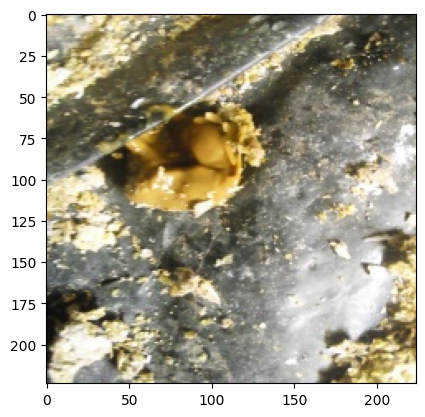


Sample healthy image:


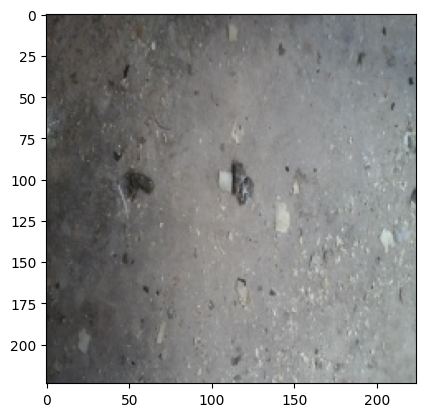


Sample ncd image:


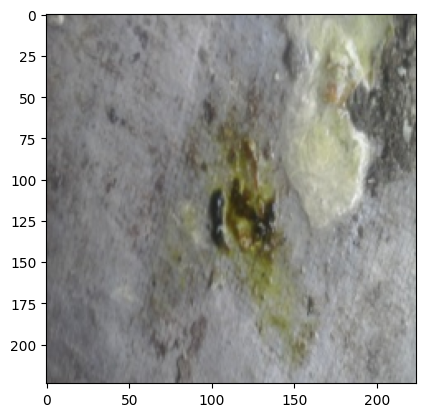


Sample salmonella image:


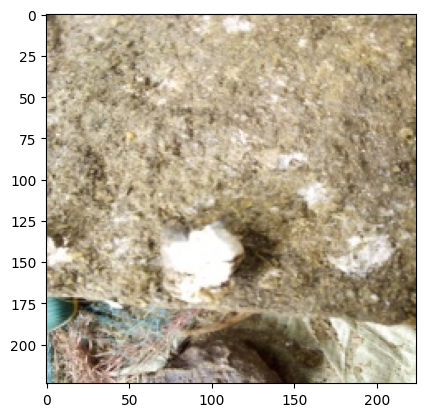

In [7]:
# grader-required-cell
import random
from tensorflow.keras.preprocessing.image import load_img

index = random.randint(0,50)
print("Sample coccidiosis image:")
plt.imshow(load_img(f"{os.path.join(train_coccidiosis_path, os.listdir(train_coccidiosis_path)[index])}"))
plt.show()

print("\nSample healthy image:")
plt.imshow(load_img(f"{os.path.join(train_healthy_path, os.listdir(train_healthy_path)[index])}"))
plt.show()

print("\nSample ncd image:")
plt.imshow(load_img(f"{os.path.join(train_ncd_path, os.listdir(train_ncd_path)[index])}"))
plt.show()

print("\nSample salmonella image:")
plt.imshow(load_img(f"{os.path.join(train_salmonella_path, os.listdir(train_salmonella_path)[index])}"))
plt.show()


## checking the image size

In [8]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(train_coccidiosis_path, os.listdir(train_coccidiosis_path)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")



Each image has shape: (224, 224, 3)
The maximum pixel value used is: 247.0


## Making data generator




In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator instance
image_datagen = ImageDataGenerator(rescale=1./255)

# Create a train generator
train_generator = image_datagen.flow_from_directory(
        f'../NOTEBOOKS/dataset/train/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=16,
        class_mode='categorical')

# Create a validation generator
val_generator = image_datagen.flow_from_directory(
        f'../NOTEBOOKS/dataset/val/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=16,
        class_mode='categorical')


Found 6452 images belonging to 4 classes.
Found 805 images belonging to 4 classes.


# Transfer Learning

## from tfhub

In [10]:
import tensorflow_hub as hub

mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3), trainable=False)

## from tensorflow api

In [11]:
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3),include_top = False, weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
# pretrained_model.trainable = False

9406464/9406464 [==============================] - 2s 0us/step


## Creating model

In [12]:
#create tensorflow model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    mobile_net_layers,
    # Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 2,340,228
Trainable params: 82,244
Non-trainable params: 2,257,984
_________________________________________________________________


In [13]:
#compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=4e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#constant for number of epochs
NUM_EPOCHS = 15

#fit model
history = model.fit(train_generator, epochs=NUM_EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/15
404/404 [==============================] - 192s 442ms/step - loss: 0.4599 - accuracy: 0.8359 - val_loss: 0.2482 - val_accuracy: 0.9155
Epoch 2/15
404/404 [==============================] - 80s 199ms/step - loss: 0.2921 - accuracy: 0.8993 - val_loss: 0.2331 - val_accuracy: 0.9242
Epoch 3/15
404/404 [==============================] - 45s 111ms/step - loss: 0.2678 - accuracy: 0.9067 - val_loss: 0.2024 - val_accuracy: 0.9317
Epoch 4/15
404/404 [==============================] - 17s 41ms/step - loss: 0.2387 - accuracy: 0.9194 - val_loss: 0.1988 - val_accuracy: 0.9329
Epoch 5/15
404/404 [==============================] - 19s 46ms/step - loss: 0.2370 - accuracy: 0.9199 - val_loss: 0.1701 - val_accuracy: 0.9404
Epoch 6/15
404/404 [==============================] - 18s 44ms/step - loss: 0.2183 - accuracy: 0.9233 - val_loss: 0.1780 - val_accuracy: 0.9416
Epoch 7/15
404/404 [==============================] - 18s 44ms/step - loss: 0.2163 - accuracy: 0.9253 - val_loss: 0.1925 - val_accur

## Testing the model

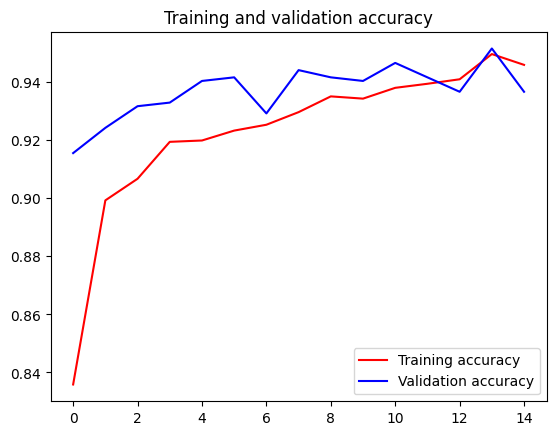

<Figure size 640x480 with 0 Axes>

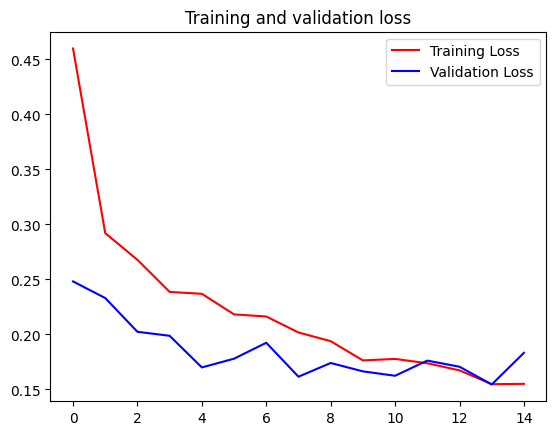

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [16]:
# calculating the recall, precision and f1-score
from sklearn.metrics import classification_report, confusion_matrix

test_generator = image_datagen.flow_from_directory(
        f'../NOTEBOOKS/dataset/test',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=16,
        shuffle=False,
        class_mode='categorical')

test_score = model.evaluate(test_generator)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

Found 810 images belonging to 4 classes.
51/51 [==============================] - 18s 348ms/step - loss: 0.1485 - accuracy: 0.9543
[INFO] accuracy: 95.43%
[INFO] Loss:  0.14853553473949432


### Confusion Matrix

51/51 [==============================] - 5s 72ms/step
Confusion Matrix
[[238   3   4   4]
 [  8 226   2   5]
 [  1   4  49   3]
 [  0   2   1 260]]
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

 coccidiosis       0.96      0.96      0.96       249
     healthy       0.96      0.94      0.95       241
         ncd       0.88      0.86      0.87        57
  salmonella       0.96      0.99      0.97       263

    accuracy                           0.95       810
   macro avg       0.94      0.94      0.94       810
weighted avg       0.95      0.95      0.95       810



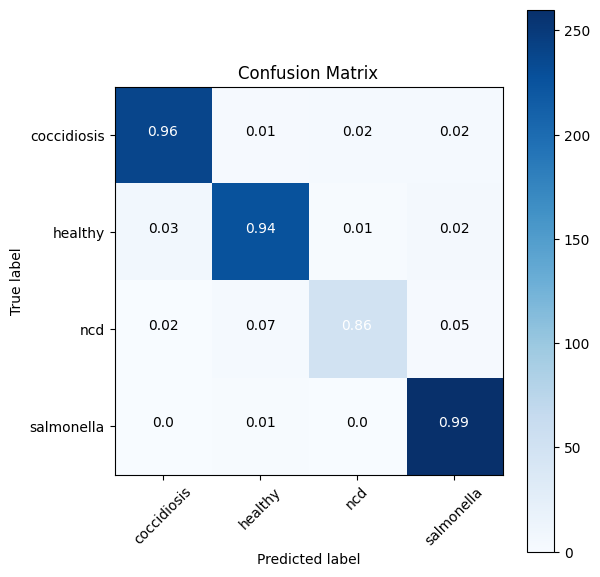

In [17]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

# Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Print the Target names
target_names = []
for key in test_generator.class_indices:
    target_names.append(key)

# Confusion Matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(confusion_matrix(test_generator.classes, y_pred))
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

# Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


### Testing using image

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  index = np.argmax(classes[0])
  
  if index == 0:
    print('coccidiosis')

  elif index == 1:  
    print('healthy')
    
  elif index == 2:
    print('ncd')

  else:
    print('salmo')

### Manual testing

## Generate a model

In [18]:
export_path = "saved_model/MobileNet_Model"
model.save(export_path)

INFO:tensorflow:Assets written to: saved_model/MobileNet_Model\assets


INFO:tensorflow:Assets written to: saved_model/MobileNet_Model\assets


In [21]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model.
tflite_model_file = 'tflite_models/MobileNet_Model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)


In [22]:
import pathlib

tflite_model_file = 'tflite_models/MobileNet_Model.tflite'
tflite_model_file = pathlib.Path(tflite_model_file)

# Get the file size of the model in MegaBytes
print(f"The size of the tflite model is: {round(tflite_model_file.stat().st_size / (1024 * 1024), 2)} MB")

The size of the tflite model is: 2.47 MB
